# An Implementation of Flower Pollination Algorithm using Python

In [1]:
import numpy as np
from scipy.stats import levy
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib import animation

In [2]:
df = pd.read_excel('dataset.xlsx')
df = df.drop('Unnamed: 0', axis=1)
df['periode'] = df['Tahun'].astype(str) + ' ' + df['Bulan']
df = df.drop(['Tahun', 'Bulan'], axis=1)
df = df.set_index('periode')
df.head(10)

,Migas,Non Migas,Jumlah
periode,,,
2020 January,2069.7,48830.4,50900.1
2020 February,2166.9,47504.3,49671.2
2020 March,2007.4,52061.4,54068.8
2020 April,1929.8,43242.9,45172.7
2020 May,2153.5,40082.7,42236.2
2020 June,2288.9,44098.9,46387.8
2020 July,2260.6,43809.3,46069.9
2020 August,2204.9,41360.3,43565.2
2020 September,2478.2,41454.9,43933.1


In [3]:
y = df['Migas']
lookback = 6

def predict(x, weights):
    return np.sum(x.values * weights[1:]) + weights[0]

def objective(weights):
    preds = []

    for i in range(lookback, len(df)):
        x = y[i-lookback:i]
        pred = predict(x, weights)
        preds.append(pred)

    preds = np.array(preds)
    target = y[lookback:].values
    mse = np.mean(np.square(target - preds))
    return mse

In [4]:
np.random.seed(42)

def run_fpa(num_flowers, p, gamma, max_iterations, verbose=True):
    # Initialize population
    flowers = np.random.uniform(-1, 1, (num_flowers, lookback+1)) * 10

    # Determine best solution
    g_star = flowers[0]
    for flower in flowers:
        if objective(flower) < objective(g_star):
            g_star = flower

    # print(flowers.round(2))
    if verbose:
        print('Initial best objective:')
        print(objective(g_star))

    # FPA
    results = []
    for t in range(max_iterations):
        for i in range(num_flowers):
            rand = np.random.uniform(0, 1)

            if rand < p:
                # global pollination
                L = levy.rvs(size=flower.shape[0])
                new_flower = flowers[i] + gamma * L * (g_star - flowers[i])
            else:
                # local
                epsilon = np.random.uniform(0, 1)
                j, k = np.random.choice(num_flowers, 2, replace=False)
                new_flower = flowers[i] + epsilon * (flowers[j] - flowers[k])

            # update if better
            new_objective = objective(new_flower)
            if new_objective < objective(flowers[i]):
                flowers[i] = new_flower

        # find new g_star
        for flower in flowers:
            if objective(flower) < objective(g_star):
                g_star = flower

        best_objective = objective(g_star)
        results.append(best_objective)
        if verbose:
            print(f'Iteration {t+1}: {best_objective:.2f}')

    return g_star, results

In [7]:
max_iterations = 50

list_num_flowers = [50]
list_p = [0.1, 0.5, 0.9]
list_gamma = [0.01]

results = []

for num_flowers in list_num_flowers:
    for p in list_p:
        for gamma in list_gamma:
            print(f'num_flowers={num_flowers}, p={p}, gamma={gamma}')
            g_star, fpa_result = run_fpa(num_flowers, p, gamma, max_iterations, verbose=True)
            results.append({
                'num_flowers': num_flowers,
                'p': p,
                'gamma': gamma,
                'weight': g_star,
                'mse': objective(g_star)
            })

num_flowers=50, p=0.1, gamma=0.01
Initial best objective:
13077962.163690638
Iteration 1: 12761058.46
Iteration 2: 7427940.90
Iteration 3: 7427940.90
Iteration 4: 4556415.02
Iteration 5: 4556415.02
Iteration 6: 4556415.02
Iteration 7: 4556415.02
Iteration 8: 4556415.02
Iteration 9: 4556415.02
Iteration 10: 4556415.02
Iteration 11: 4556415.02
Iteration 12: 3094481.91
Iteration 13: 3094481.91
Iteration 14: 3094481.91
Iteration 15: 3094481.91
Iteration 16: 3094481.91
Iteration 17: 3094481.91
Iteration 18: 3094481.91
Iteration 19: 3094481.91
Iteration 20: 3094481.91
Iteration 21: 3094481.91
Iteration 22: 3094481.91
Iteration 23: 3094481.91
Iteration 24: 3094481.91
Iteration 25: 3094481.91
Iteration 26: 1311199.51
Iteration 27: 1311199.51
Iteration 28: 1311199.51
Iteration 29: 1311199.51
Iteration 30: 1311199.51
Iteration 31: 1311199.51
Iteration 32: 1311199.51
Iteration 33: 1131515.79
Iteration 34: 1131515.79
Iteration 35: 1131515.79
Iteration 36: 987582.29
Iteration 37: 987582.29
Iteratio

In [8]:
df_results = pd.DataFrame(results)
df_results = df_results.sort_values('mse')
best_mse = df_results.iloc[0]['mse']
print('Best MSE:', best_mse)

Best MSE: 248364.0956395076


In [9]:
g_star = df_results.iloc[0]['weight']
print('g_star:', g_star)

g_star: [50.8083574  -0.29837255  0.50239407 -0.71708133  1.17478738 -0.97733774
  1.32329627]


In [10]:
def forecast(x, weights, n):
    preds = []
    for i in range(n):
        pred = predict(x, weights)
        preds.append(pred)
        x = x.shift(-1)
        x.iloc[-1] = pred
    return preds


next_months = 14
forecasted_result = forecast(y[-lookback:], g_star, next_months)
print(f'Prediksi {next_months} bulan ke-depan:')
print('\n> '.join(map(str, forecasted_result)))

Prediksi 14 bulan ke-depan:
2430.5295781723316
> 2375.243630361714
> 2337.296739723037
> 2551.6163747140145
> 2607.031642048356
> 2658.627854734801
> 2810.6901300931013
> 2870.3347093775997
> 2940.5185086510555
> 3080.6349369106106
> 3167.8731243689335
> 3247.055338483314
> 3365.449087636033
> 3464.206393932372


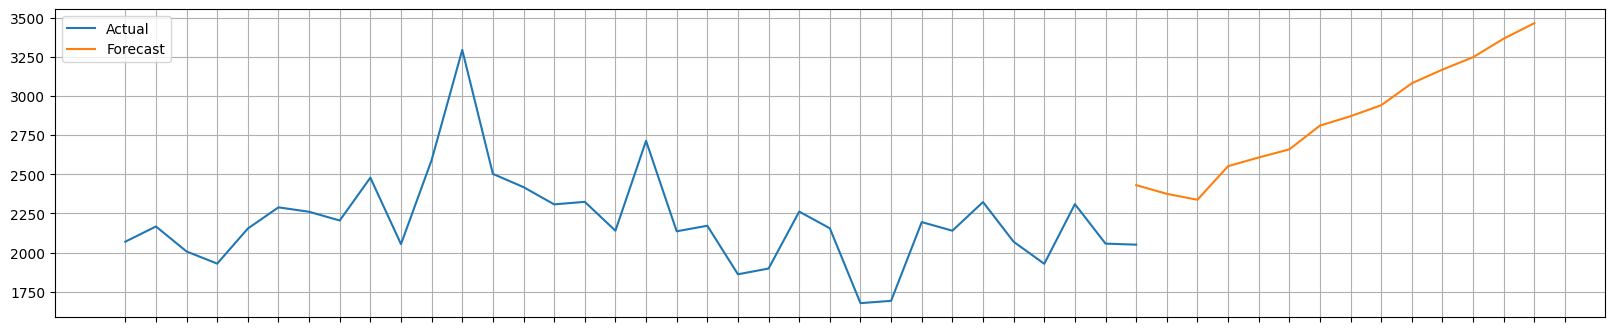

In [19]:
plt.figure(figsize=(20, 4))
plt.plot(y, label='Actual')
plt.plot(range(len(y) - 1, len(y)+next_months - 1), forecasted_result, label='Forecast')
plt.legend()
plt.gca().set_xticks(range(0, len(y)+next_months, 12), minor=True)
plt.gca().set_xticks(range(0, len(y)+next_months, 1), minor=False)
plt.gca().set_xticklabels([], minor=False)
plt.grid()
plt.gca().set_axisbelow(True)
plt.show()